# Store sales analysis - EDA process

## Install packages

In [2]:
install.packages("lubridate")
install.packages("caret")
install.packages("rpart")
install.packages("MLmetrics")
library(tidyverse) 
library(ggplot2)
library(lubridate)
library(caret)
library(rpart)
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following 

## Preview and Prepare data


In [3]:
# read our dataset
df <- read.csv("../input/store-dataset/sample_store_df.csv")

In [4]:
glimpse(df)

Rows: 9,994
Columns: 21
$ Row.ID         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Order.ID       <chr> "CA-2019-152156", "CA-2019-152156", "CA-2019-138688", "…
$ Order.Date     <chr> "11/8/2019", "11/8/2019", "6/12/2019", "10/11/2018", "1…
$ Ship.Date      <chr> "11/11/2019", "11/11/2019", "6/16/2019", "10/18/2018", …
$ Ship.Mode      <chr> "Second Class", "Second Class", "Second Class", "Standa…
$ Customer.ID    <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-203…
$ Customer.Name  <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean …
$ Segment        <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consu…
$ Country.Region <chr> "United States", "United States", "United States", "Uni…
$ City           <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderda…
$ State          <chr> "Kentucky", "Kentucky", "California", "Florida", "Flori…
$ Postal.Code    <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032,…
$ Region        

In [5]:
head(df)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country.Region,City,⋯,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,6,CA-2017-115812,6/9/2017,6/14/2017,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


In [6]:
# filter NA value
df <- df %>%
na.omit()

In [7]:
## check if Quantity contains value 0
df %>%
select(Quantity) %>%
filter(Quantity <= 0) 

Quantity
<int>


In [8]:
## convert Date format to YYYY-mm-dd
df <- df %>%
mutate(Order.Date = mdy(Order.Date),
      Ship.Date = mdy(Ship.Date),
      Year = year(Order.Date))

In [9]:
# change column 'Country.Region' name to Country
colnames(df)[9] <- "Country"

Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,⋯,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Year
<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2624,CA-2020-127180,2020-10-22,2020-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,⋯,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,3919.989,2020
2698,CA-2017-145317,2017-03-18,2017-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,⋯,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.078,2017
4191,CA-2020-166709,2020-11-17,2020-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,⋯,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.986,2020
6827,CA-2019-118689,2019-10-02,2019-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,⋯,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,2019
8154,CA-2020-140151,2020-03-23,2020-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,⋯,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.981,2020


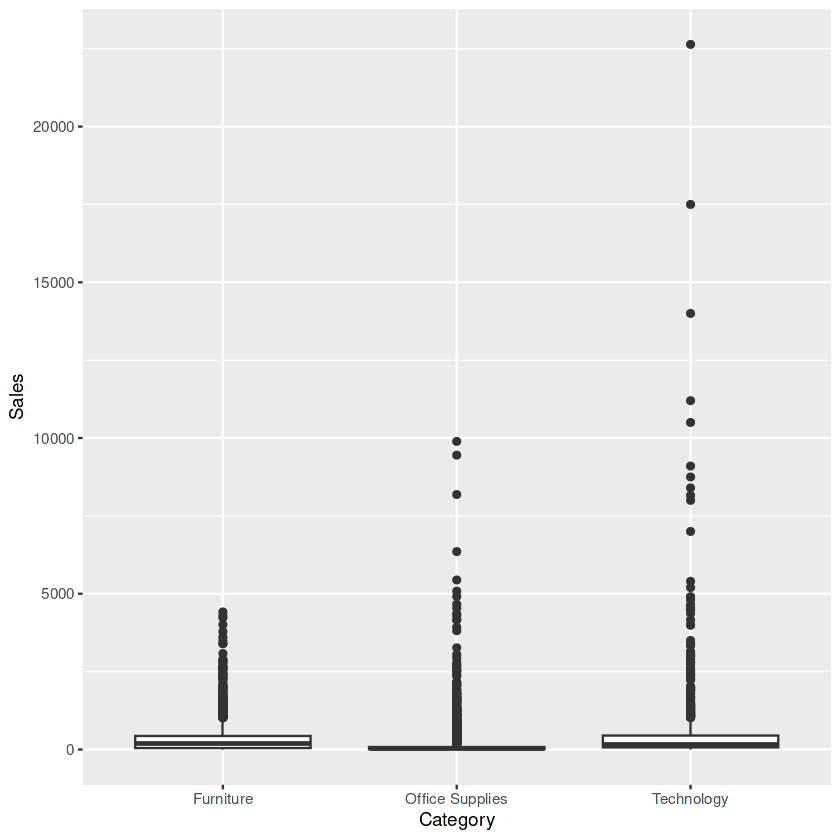

In [10]:
# detect & remove outlier 
ggplot(df, aes(Category,Sales)) +
geom_boxplot()

filter(df, Sales > 10000)
df <- df[-c(2623,2697,6825,4190,8152),]

In [11]:
# create a new cluster column
set.seed(17) 
(cluster <- kmeans(df$Sales,4))

df$Cluster <- cluster$cluster

K-means clustering with 4 clusters of sizes 8432, 1245, 262, 39

Cluster means:
        [,1]
1   77.10239
2  671.28804
3 1959.01367
4 5468.99033

Clustering vector:
   [1] 1 2 1 2 1 1 1 2 1 1 3 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 2 1
  [38] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 [149] 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 4 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1
 [186] 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 [223] 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 2 1
 [260] 1 1 1 3 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 [297] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 [334] 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2
 [371] 1 1 1 2 1 2 1 3 1 

In [ ]:
# convert data type from integer to character
df$Cluster <- as.character(df$Cluster)

In [ ]:
# remove segment column
df <- df[,-8]

In [ ]:
## write csv
write.csv(df,"cleaned_df.csv",row.names = F)

#### Conclusion:
* #### Store dataset contains 9,982 rows and 22 columns
* #### There is no missing value in the dataset
* #### 5 outliers were detected and removed for better view in visualization processing
* #### Our dataset was seperated to 4 clusters using kmeans() 
* #### Dataset contains 4 data types which are character, integer, date and double
* #### Date format of Order.Date and Ship.Date were changed from MM-DD-YYYY to YYYY-MM-DD format
* #### Dataset contains 2 date variables : Order.Date and Ship.Date
* #### Dataset contains 9 categorical variables : Ship.Mode,Country, City, State, Region, Category, Sub.Category, Cluster and Year
* #### Dataset contains 6 numeric variables : Row.ID, Sales, Quantity, Discount and Profit

## Data Description

### Numerical Variables descriptions

In [ ]:
df %>% select(Sales,Quantity,Discount,Profit) %>% summary()

df %>% summarise(Std_Sales = sd(Sales),
                Std_Quantity = sd(Quantity),
                Std_Discount = sd(Discount),
                Std_Profit = sd(Profit)) %>%
                pivot_longer(cols = c("Std_Sales", "Std_Quantity","Std_Discount","Std_Profit"),
                         names_to = "Variable", values_to = "Value")

### Categorical Variables descriptions

#### Count unique values of categorical variables

In [ ]:
(cate_df <- df %>% 
  summarise(Ship_Mode = n_distinct(Ship.Mode),
            City = n_distinct(City),
            State = n_distinct(State),
            Region = n_distinct(Region),
            Category = n_distinct(Category),
            Sub_Category = n_distinct(Sub.Category),
            Country =  n_distinct(Country), 
            Cluster = n_distinct(Cluster),
            Year = n_distinct(Year)) %>%
            pivot_longer(cols = c("Ship_Mode","Country","City","State","Region","Category","Sub_Category",, "Cluster","Year"),
                         names_to = "Variable", values_to = "Value"))

## Correlation of numerical varaibles

#### Correlation value measures the relationship between two variables (ranging from -1 to +1).  A value closer to -1 or +1 indicates a stronger 

#### relationship (-1 is negative and +1 is positive), while a value closer to 0 suggests a weaker or no relationship. 




In [ ]:
df %>%
select(Sales,Quantity,Discount,Profit) %>%
cor()

#### Conclusion:
* #### There is a slightly weak relationship between Sales and Profit
* #### There is no significant relationship between Profit and other variables
* #### There is a weak positive relationship between Sales and Quantity but not really significant

## Visualize categorical varibales


### Bar chart shows numbers of observations of each categorical variables

In [ ]:
# Ship.Mode
ggplot(df, aes(Ship.Mode)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# Country
ggplot(df, aes(Country)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# City
ggplot(df, aes(City)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

In [ ]:
# State
ggplot(df, aes(State)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

In [ ]:
# Category
ggplot(df, aes(Region)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# Category
ggplot(df, aes(Category)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# Sub.Category
ggplot(df, aes(Sub.Category)) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip()

In [ ]:
# Cluster
ggplot(df, aes(Cluster)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# Year
ggplot(df, aes(Year)) +
      geom_bar(fill = "salmon") +
      theme_minimal()

In [ ]:
# Ship.Mode group by Cluster
ggplot(df, aes(Ship.Mode, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# Country group by Cluster
ggplot(df, aes(Country, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# City group by Cluster
ggplot(df, aes(City, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# State group by Cluster
ggplot(df, aes(State, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# Region group by Cluster
ggplot(df, aes(Region, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# Category group by Cluster
ggplot(df, aes(Category, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# Sub.Category group by Cluster
ggplot(df, aes(Sub.Category, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

In [ ]:
# Year group by Cluster
ggplot(df, aes(Year, fill = Cluster)) +
      geom_bar() +
      theme_minimal()

#### Conclusion :
* #### There are some huge difference of frequencies between variables in Ship.Mode, City, State, Category and Sub.Category.
* #### In Ship.Mode, Standard class has the most observations.
* #### In State, California has the most observations.
* #### In Region, West region has the most observations.
* #### In Categoy, Office supplies has the most observations.
* #### The number of sales have been increasing every year.

## Visualize Numerical variables

### Histogram

In [ ]:
# Sales
ggplot(df, aes(Sales)) +
geom_histogram(bins = 15, fill = "green4") +
theme_minimal()

In [ ]:
# Quantity
ggplot(df, aes(Quantity)) +
geom_histogram(bins = 12, fill = "green4") +
theme_minimal()

In [ ]:
# Discount
ggplot(df, aes(Discount)) +
geom_histogram(bins = 15, fill = "green4") +
theme_minimal()

In [ ]:
# Profit
ggplot(df, aes(Profit)) +
geom_histogram(bins = 20, fill = "green4") +
theme_minimal()

#### Conclusion:
* #### Most of the sales run between 0 to 1250.
* #### Most of the quantities run between 1 to 3.
* #### Most of the discounts was provided between 0 to 0.2.
* #### Most of the products have the profits below 2000.

### Boxplot

In [ ]:
# Sales
ggplot(df, aes(Cluster,Sales, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

In [ ]:
# Quantity
ggplot(df, aes(Cluster,Quantity, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

In [ ]:
# Discount
ggplot(df, aes(Cluster,Discount, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

In [ ]:
# Profit
ggplot(df, aes(Cluster,Profit, fill = Cluster)) +
geom_boxplot() +
theme_minimal()

#### Conclusion:
* #### All clusters mostly have the sales below 6000.
* #### All clusters mostly have the quantities below 8.
* #### 50% of all clusters have the discounts below 0.2.
* #### 50% of cluster 4 products generated profit between 0 - 5000.

### Scatter plot

In [ ]:
# Sales and Quantity
ggplot(df, aes(Sales,Quantity)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal() 

In [ ]:
# Sales and Discount
ggplot(df, aes(Sales,Discount)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

In [ ]:
# Sales,Profit
ggplot(df, aes(Sales,Profit)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

In [ ]:
# Quantity,Discount
ggplot(df, aes(Quantity,Discount)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

In [ ]:
# Quantity,Profit
ggplot(df, aes(Quantity,Profit)) +
geom_point(col = "blue3") +
theme_minimal() +
geom_smooth(method = 'lm')

In [ ]:
# Discount,Profit
ggplot(df, aes(Discount,Profit)) +
geom_point(col = "blue3") +
geom_smooth(method = 'lm') +
theme_minimal()

In [ ]:
# Sales,Quantity group by Cluster
ggplot(df, aes(Sales,Quantity, col = Cluster)) +
geom_point() +
geom_smooth(method = 'lm') +
theme_minimal() +
facet_wrap( ~Cluster, ncol=2) 

In [ ]:
# Sales,Profit group by Cluster
ggplot(df, aes(Sales,Profit, col = Cluster)) +
geom_point() +
geom_smooth(method = 'lm') +
theme_minimal() +
facet_wrap( ~Cluster, ncol=2)


#### Conclusion:
* #### Sales and Quantity have the strong postive relationship.
* #### Sales and Profit have the positive relationship.
* #### Only cluster 4 products made increasing profit.

## Performing Classification Analysis


In [ ]:
# subset specific data from df
df_subset <- df %>% 
select(Cluster,Sales,Quantity,Discount,Profit) %>%
as_tibble()

In [ ]:
# split data
set.seed(21)
n <- nrow(df)
id <- sample(1:n, size = n*0.8)
train_data <- df_subset[id, ]
test_data <- df_subset[-id, ]

### KNN model

In [ ]:
# train knn model
set.seed(42)

ctrl <- trainControl(
  method = "cv", 
  number = 5
)

(knn_model <- train(Cluster ~ .,
               data = train_data,
               method = "knn",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               trControl = ctrl))

In [ ]:
## predict model 
p_knn <- predict(knn_model, newdata = test_data)

In [ ]:
## score model
(score_knn <- confusionMatrix( factor(p_knn), factor(test_data$Cluster),
                mode = "prec_recall"))

acc_knn <- Accuracy(p_knn, test_data$Cluster)

### Desicion tree model

In [ ]:
# train model
set.seed(88)

ctrl <- trainControl(
  method = "cv", 
  number = 5
)

(dt_model <- train(Cluster ~ .,
               data = train_data,
               method = "rpart",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               trControl = ctrl))

In [ ]:
# predict model 
p_dt <- predict(dt_model, newdata = test_data)

In [ ]:
# score model
(score_dt <- confusionMatrix( factor(p_dt), factor(test_data$Cluster),
                mode = "prec_recall"))

acc_dt <- Accuracy(p_dt, test_data$Cluster)

### Random forest model

In [ ]:
# train model
mtry_grid <- data.frame(mtry = 2:4)

(rf_model <- train(Cluster ~ .,
               data = train_data,
               method = "rf",
               preProcess = c("center","scale"),
               metric = "Accuracy",
               tuneGrid = mtry_grid,
               trControl = ctrl))

In [ ]:
## predict model 
p_rf <- predict(rf_model, newdata = test_data)

In [ ]:
# score model
(score_rf <- confusionMatrix( factor(p_rf), factor(test_data$Cluster),
                mode = "prec_recall"))
acc_rf <- Accuracy(p_rf, test_data$Cluster)

## Model comparison

In [ ]:
acc_models <- c(acc_knn,
                    acc_dt,
                    acc_rf)

models <- c("KNN","DecisionTree","RandomForest")

(compare_models <- data.frame(model = models,accuracy = acc_models))

In [ ]:
# visualize result
compare_models %>% 
ggplot( aes(model,accuracy)) +
geom_col(fill = "aquamarine4") +
theme_minimal()

#### Conclusion:
* #### Random Forest model has accuracy score equal to 1 which is the most accuracy score compare to Decision Tree and KNN model.